In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#import seaborn as sns
import pandas as pd
import os
import sys

In [2]:
# IMPORT Z SPACE DATA

catalog_name = 'SextansInSextans'

path = catalog_name+'_8deg/'
savepath = path+'Figaro_outputs/'

if not os.path.exists(savepath):
    os.makedirs(savepath)

X_test = pd.read_csv(path+catalog_name+'_X_test_4deg_region.csv')
z_test = pd.read_csv(path+catalog_name+'_z_test_4deg_region.csv')
z_test = z_test.drop(columns=['Unnamed: 0'])

X_test.head()

,Unnamed: 0,source_id,Xi,Xn,PMra,PMdec,BP0-RP0,G0_c,pmra_error,pmdec_error,bp_rp_error,pmra_pmdec_corr,phot_g_mean_mag_err,phot_bp_mean_mag_err
0,0,42,0.199161,0.162134,0.201145,-0.131495,1.029419,18.568840,0.225242,0.206527,0.002383,-0.367,0.003256,0.030184
1,1,42,-0.075944,-0.039725,0.379045,-0.602397,0.298181,19.978202,0.595340,0.555672,0.001584,-0.367,0.005651,0.074991
2,2,42,-0.053916,-0.042126,2.049480,0.719047,1.023850,20.833780,1.284862,1.106866,0.008237,-0.367,0.008196,0.117802
3,3,42,0.112033,-0.112326,0.221642,0.358836,0.928169,19.829909,0.519147,0.484691,0.005141,-0.367,0.004981,0.077385
4,4,42,-0.319840,0.079460,-0.920303,-0.092150,-0.099776,20.260250,0.747930,0.700570,-0.000582,-0.367,0.006613,0.083885


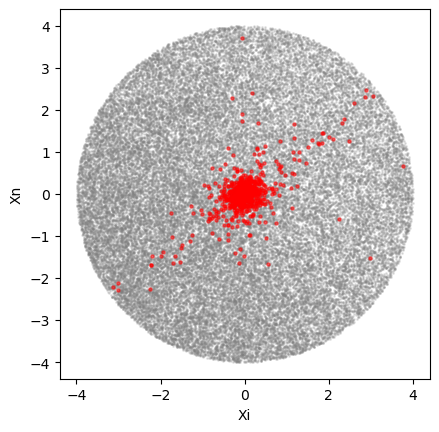

In [3]:
members_indices = np.where(X_test['source_id'] == 42)[0]

plt.scatter(X_test['Xi'], X_test['Xn'], s=1, alpha=0.2, color='grey')
plt.scatter(X_test['Xi'][members_indices], X_test['Xn'][members_indices], s=5, alpha=0.5, color='red')
plt.xlabel('Xi')
plt.ylabel('Xn')
plt.gca().set_aspect('equal', adjustable='box')

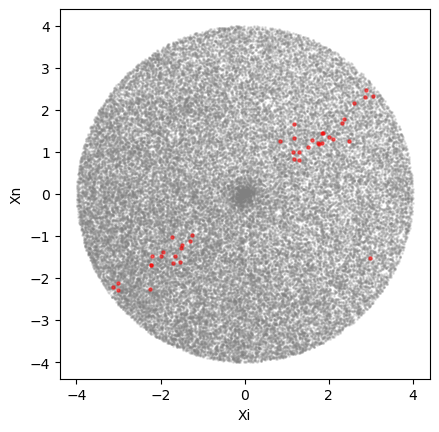

In [4]:
# taking only the tails stars
tails_members_indices = np.where((X_test['source_id'] == 42) & (np.abs(X_test['Xi'])>0.8) & (np.abs(X_test['Xn'])>0.8))[0]

plt.scatter(X_test['Xi'], X_test['Xn'], s=1, alpha=0.2, color='grey')
plt.scatter(X_test['Xi'][tails_members_indices], X_test['Xn'][tails_members_indices], s=5, alpha=0.5, color='red')
plt.xlabel('Xi')
plt.ylabel('Xn')
plt.gca().set_aspect('equal', adjustable='box')

In [5]:
print('Number of tails members:', len(tails_members_indices))

# import npy file with posterior probabilities
pB_full_posterior = np.load(savepath + catalog_name + '_pB_full_posterior.npy')

tails_full_posterior = pB_full_posterior[tails_members_indices, :].copy()

print('shape of tails_full_posterior:', tails_full_posterior.shape)

Number of tails members: 41
shape of tails_full_posterior: (41, 10)


In [6]:
df_tails_full_posterior = pd.DataFrame(tails_full_posterior.T, columns=[f'source_{i}' for i in range(tails_full_posterior.shape[0])])

df_tails_full_posterior.head(15)

,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,source_8,source_9,...,source_31,source_32,source_33,source_34,source_35,source_36,source_37,source_38,source_39,source_40
0,0.956907,0.996437,0.992932,0.985694,0.967174,0.878580,0.988936,0.958879,0.996444,0.998768,...,0.997769,0.988739,0.929850,0.984942,0.999348,0.998617,0.975841,0.993944,0.992093,0.000010
1,0.923980,0.991858,0.979094,0.948678,0.883655,0.640154,0.955198,0.845702,0.985008,0.994759,...,0.990202,0.951951,0.749205,0.936251,0.997098,0.993853,0.900241,0.973356,0.965346,0.000002
2,0.897102,0.988708,0.971334,0.930255,0.845526,0.562880,0.939075,0.798290,0.979332,0.992747,...,0.986466,0.934589,0.682981,0.913730,0.995981,0.991497,0.866809,0.963431,0.952584,0.000002
3,0.892673,0.988184,0.969993,0.927382,0.839931,0.552465,0.936687,0.791812,0.978537,0.992464,...,0.985942,0.932194,0.674581,0.910645,0.995824,0.991166,0.862298,0.962050,0.950813,0.000002
4,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002
5,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002
6,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002
7,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002
8,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002
9,0.891829,0.988081,0.969773,0.926959,0.839085,0.550913,0.936314,0.790776,0.978405,0.992417,...,0.985854,0.931796,0.673202,0.910133,0.995798,0.991111,0.861551,0.961820,0.950518,0.000002


array([[<Axes: title={'center': 'source_0'}>,
        <Axes: title={'center': 'source_1'}>,
        <Axes: title={'center': 'source_2'}>,
        <Axes: title={'center': 'source_3'}>,
        <Axes: title={'center': 'source_4'}>,
        <Axes: title={'center': 'source_5'}>],
       [<Axes: title={'center': 'source_6'}>,
        <Axes: title={'center': 'source_7'}>,
        <Axes: title={'center': 'source_8'}>,
        <Axes: title={'center': 'source_9'}>,
        <Axes: title={'center': 'source_10'}>,
        <Axes: title={'center': 'source_11'}>],
       [<Axes: title={'center': 'source_12'}>,
        <Axes: title={'center': 'source_13'}>,
        <Axes: title={'center': 'source_14'}>,
        <Axes: title={'center': 'source_15'}>,
        <Axes: title={'center': 'source_16'}>,
        <Axes: title={'center': 'source_17'}>],
       [<Axes: title={'center': 'source_18'}>,
        <Axes: title={'center': 'source_19'}>,
        <Axes: title={'center': 'source_20'}>,
        <Axes: title

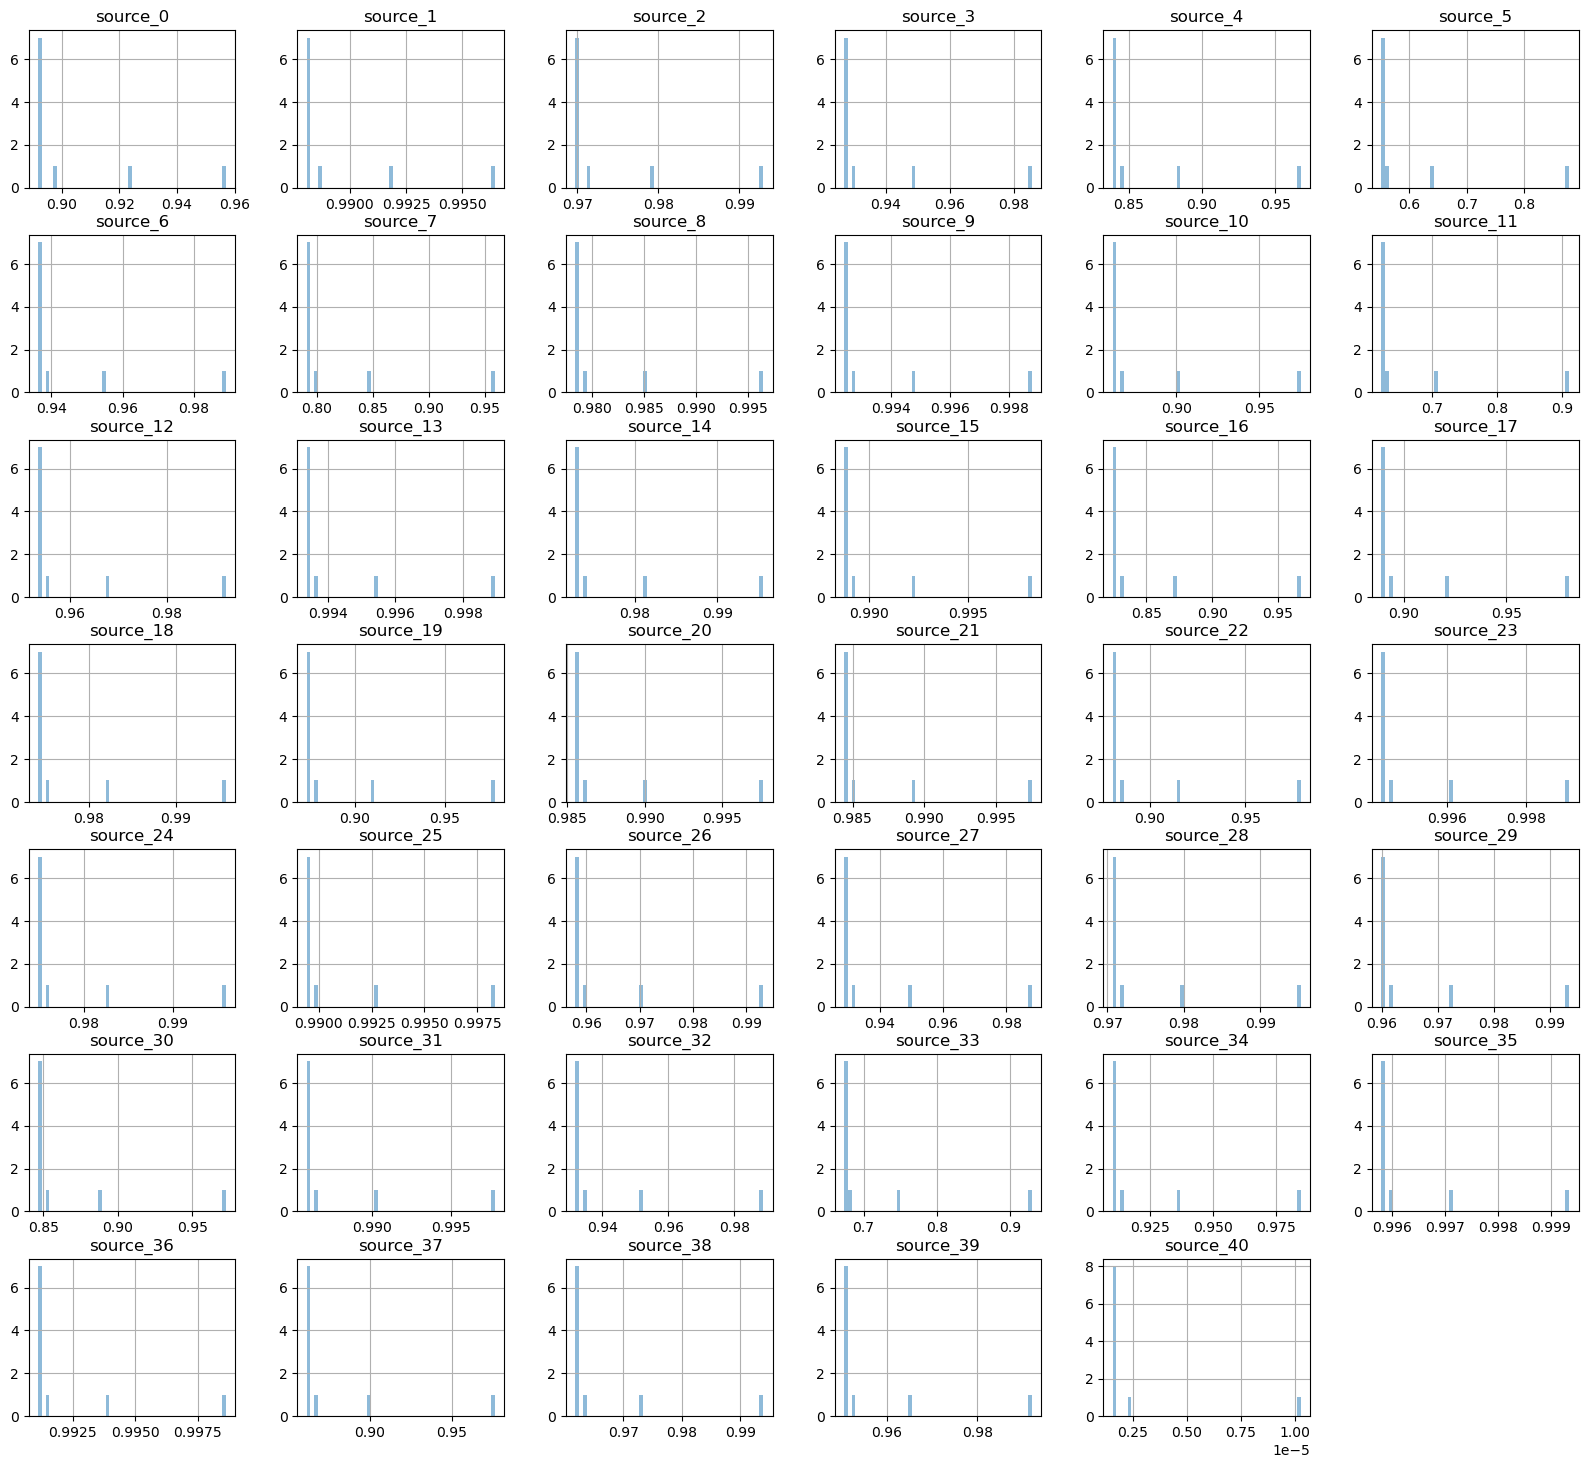

In [7]:
df_tails_full_posterior_cut = df_tails_full_posterior.iloc[:, :].copy()

df_tails_full_posterior_cut.hist(bins=50, alpha=0.5, figsize=(20, 18))

array([[<Axes: title={'center': 'source_300'}>,
        <Axes: title={'center': 'source_301'}>,
        <Axes: title={'center': 'source_302'}>,
        <Axes: title={'center': 'source_303'}>,
        <Axes: title={'center': 'source_304'}>,
        <Axes: title={'center': 'source_305'}>,
        <Axes: title={'center': 'source_306'}>],
       [<Axes: title={'center': 'source_307'}>,
        <Axes: title={'center': 'source_308'}>,
        <Axes: title={'center': 'source_309'}>,
        <Axes: title={'center': 'source_310'}>,
        <Axes: title={'center': 'source_311'}>,
        <Axes: title={'center': 'source_312'}>,
        <Axes: title={'center': 'source_313'}>],
       [<Axes: title={'center': 'source_314'}>,
        <Axes: title={'center': 'source_315'}>,
        <Axes: title={'center': 'source_316'}>,
        <Axes: title={'center': 'source_317'}>,
        <Axes: title={'center': 'source_318'}>,
        <Axes: title={'center': 'source_319'}>,
        <Axes: title={'center': 'sourc

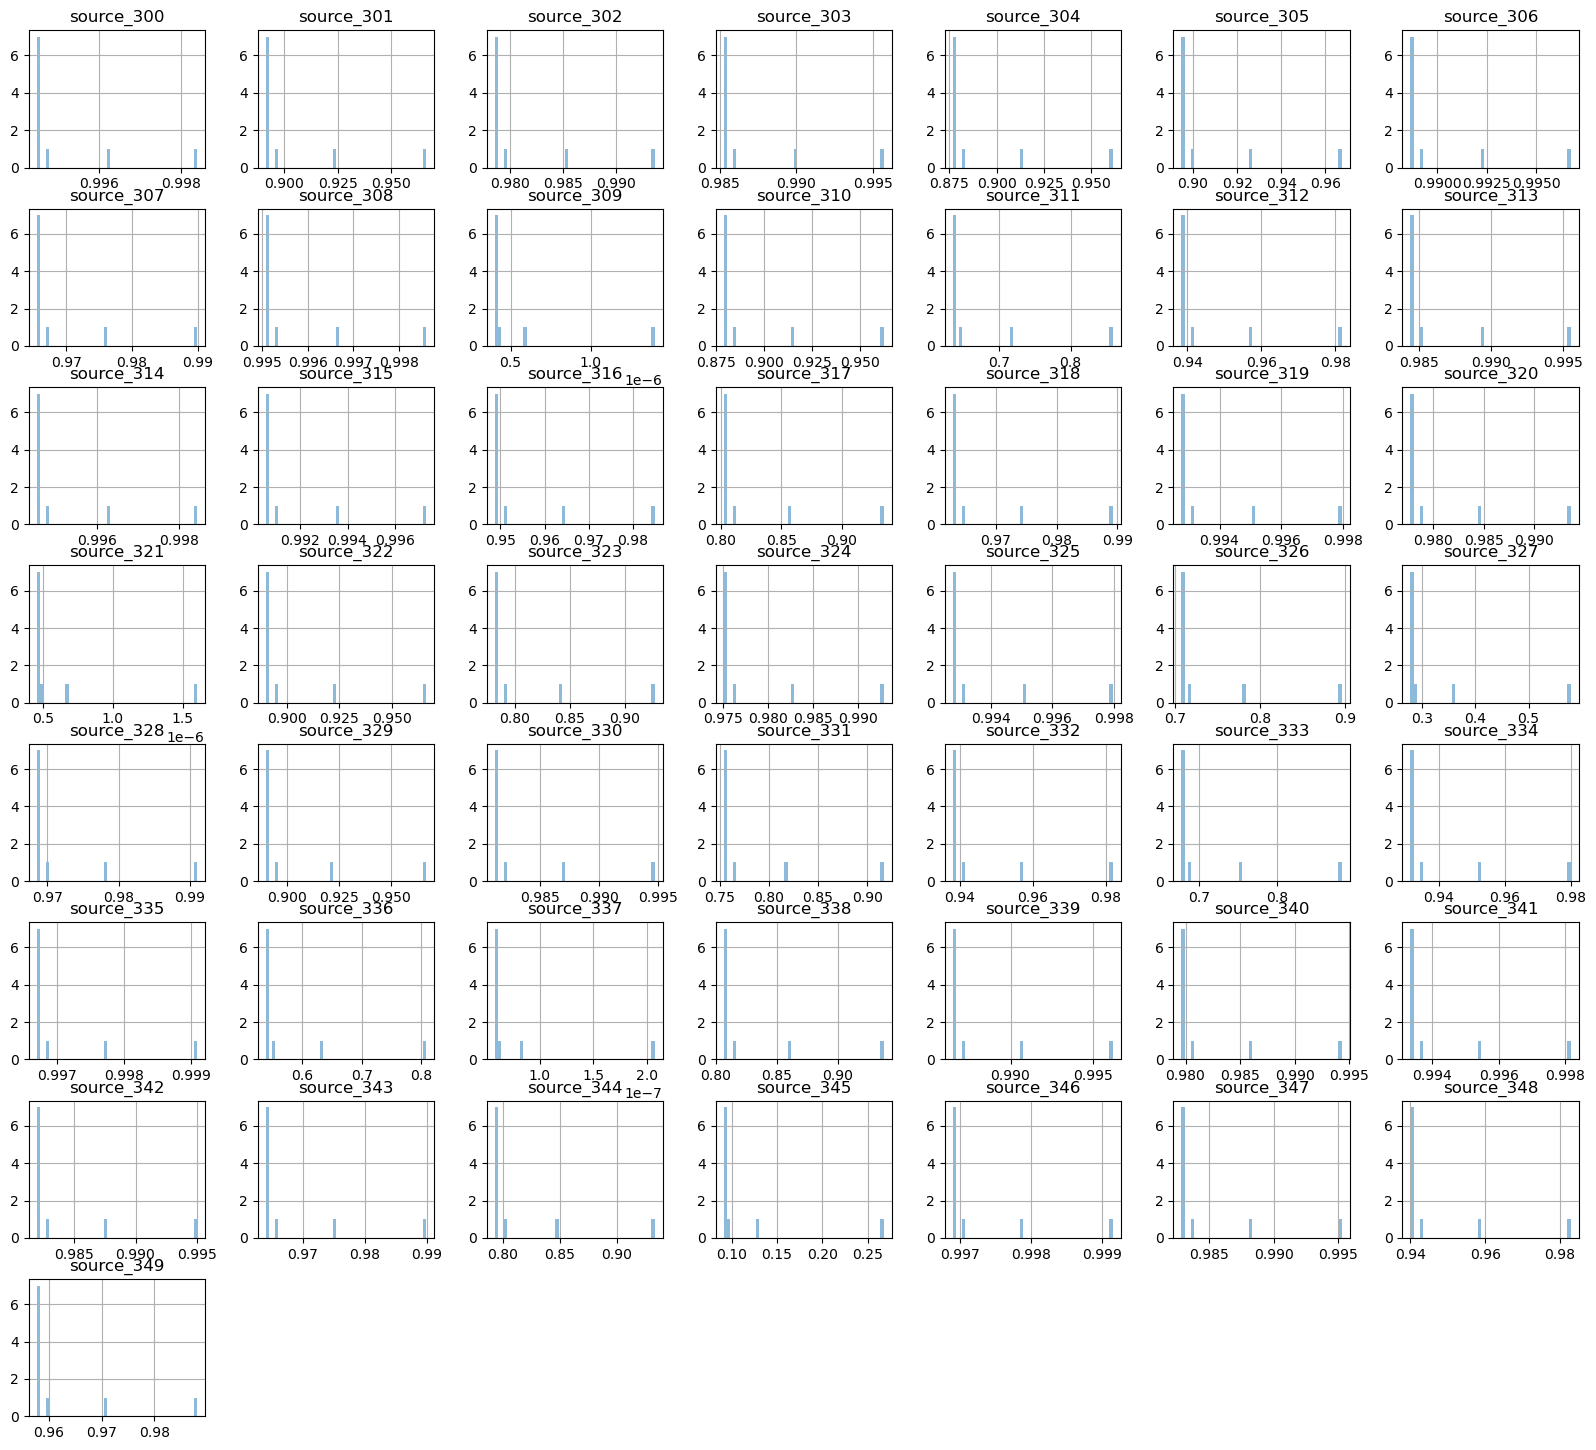

In [10]:
# taking only the central stars
central_members_indices = np.where((X_test['source_id'] == 42) & (np.abs(X_test['Xi'])<0.8) & (np.abs(X_test['Xn'])<0.8))[0]

central_full_posterior = pB_full_posterior[central_members_indices, :].copy()

df_central_full_posterior = pd.DataFrame(central_full_posterior.T, columns=[f'source_{i}' for i in range(central_full_posterior.shape[0])])

df_central_full_posterior_cut = df_central_full_posterior.iloc[:, 300:350].copy()
df_central_full_posterior_cut.hist(bins=50, alpha=0.5, figsize=(20, 18))

array([[<Axes: title={'center': 'source_0'}>,
        <Axes: title={'center': 'source_1'}>,
        <Axes: title={'center': 'source_2'}>,
        <Axes: title={'center': 'source_3'}>],
       [<Axes: title={'center': 'source_4'}>,
        <Axes: title={'center': 'source_5'}>,
        <Axes: title={'center': 'source_6'}>,
        <Axes: title={'center': 'source_7'}>],
       [<Axes: title={'center': 'source_8'}>,
        <Axes: title={'center': 'source_9'}>,
        <Axes: title={'center': 'source_10'}>,
        <Axes: title={'center': 'source_11'}>],
       [<Axes: title={'center': 'source_12'}>,
        <Axes: title={'center': 'source_13'}>,
        <Axes: title={'center': 'source_14'}>,
        <Axes: title={'center': 'source_15'}>],
       [<Axes: title={'center': 'source_16'}>,
        <Axes: title={'center': 'source_17'}>,
        <Axes: title={'center': 'source_18'}>,
        <Axes: title={'center': 'source_19'}>]], dtype=object)

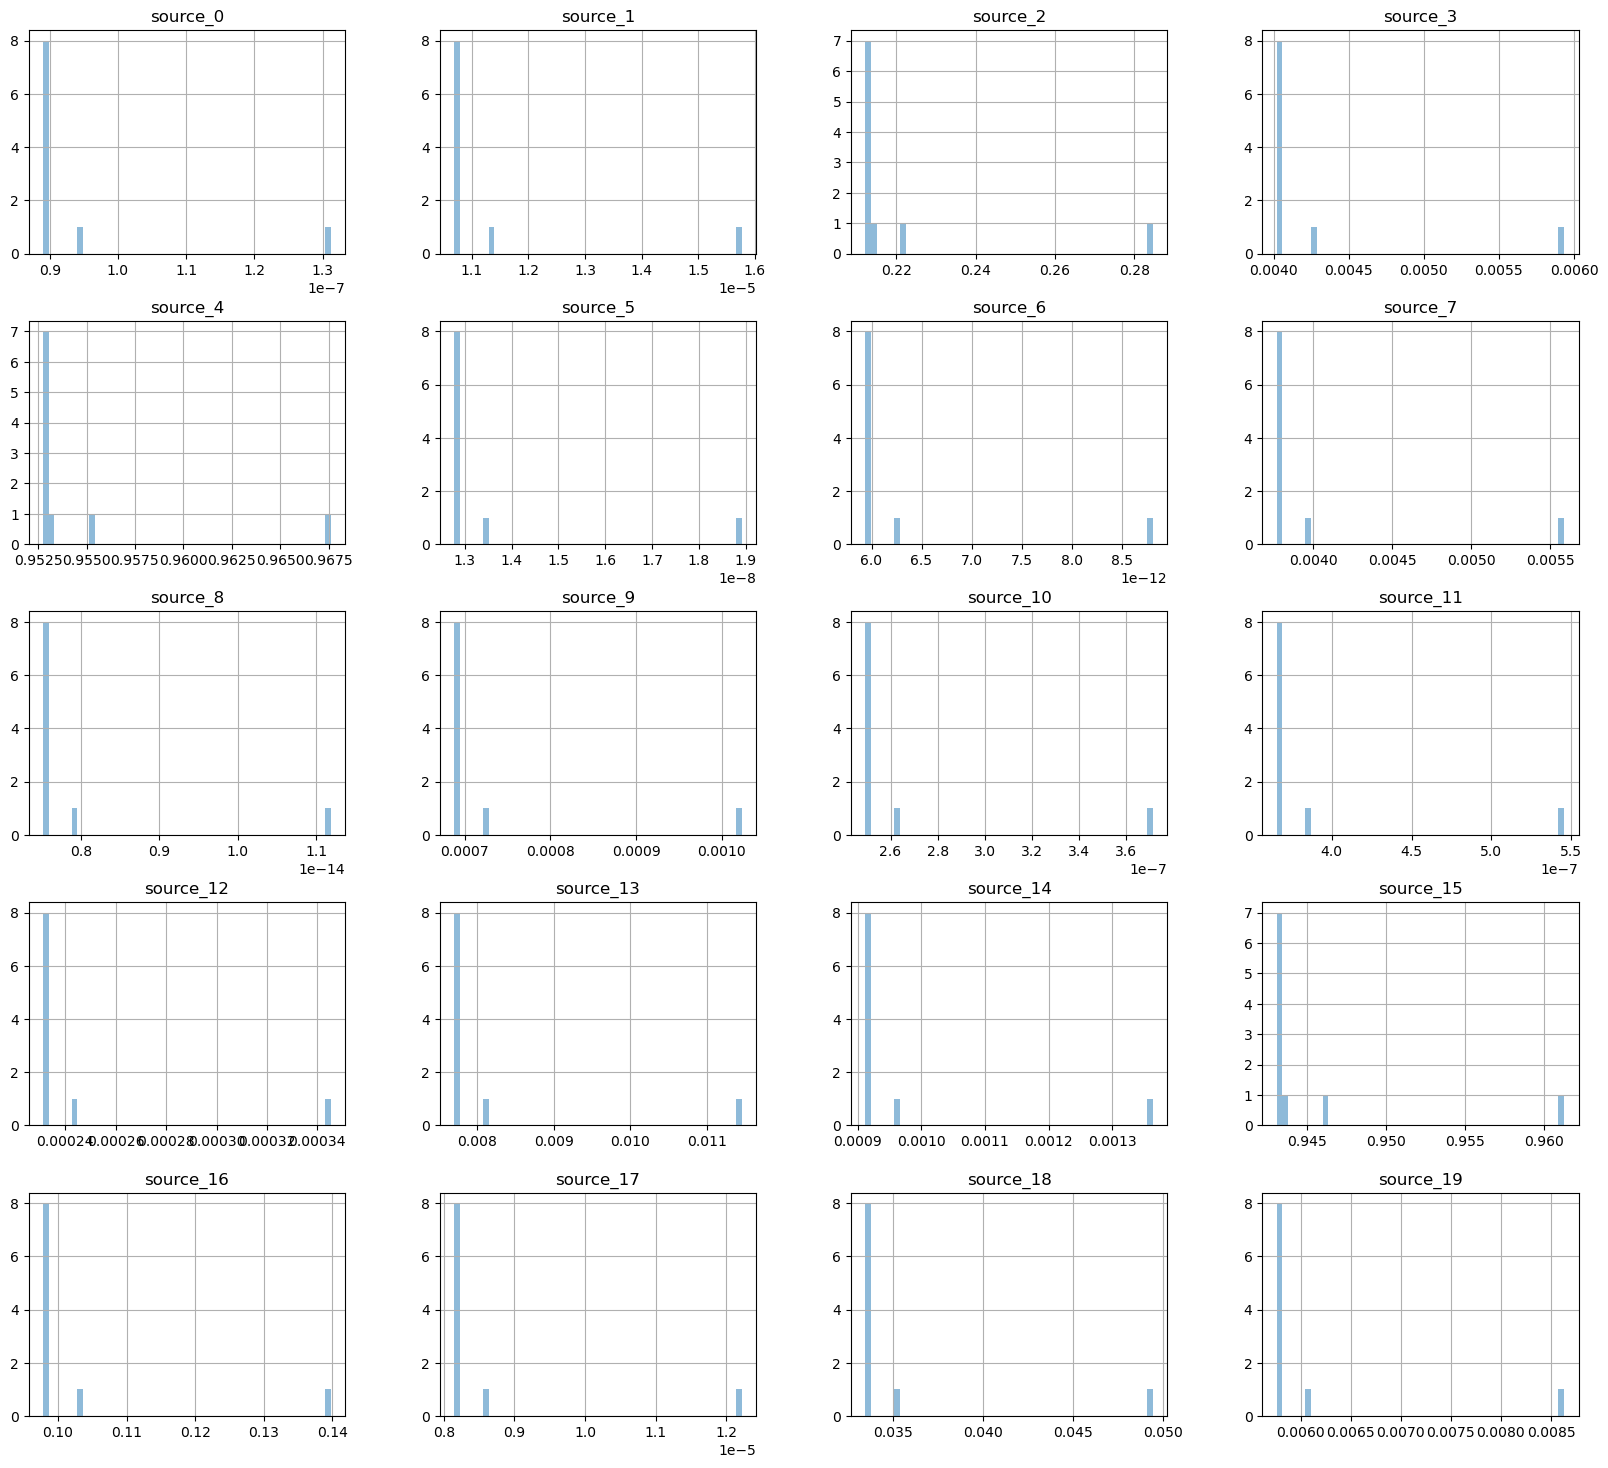

In [9]:
# random contaminants
central_full_posterior = pB_full_posterior[~central_members_indices, :].copy()

df_central_full_posterior = pd.DataFrame(central_full_posterior.T, columns=[f'source_{i}' for i in range(central_full_posterior.shape[0])])

df_central_full_posterior_cut = df_central_full_posterior.iloc[:, :20].copy()
df_central_full_posterior_cut.hist(bins=50, alpha=0.5, figsize=(20, 18))